In [59]:
import os
import shutil

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [39]:
directory_source_path = 'IMAGE SOURCE HERE'
all_items = os.listdir(directory_source_path)
labels = [item for item in all_items if os.path.isdir(os.path.join(directory_source_path, item))]

print("List of folders/labels:")
for folder in labels:
    print(folder)

List of folders:
foie_gras
club_sandwich
cheese_plate
cup_cakes
garlic_bread
gnocchi
ice_cream
samosa
donuts
tuna_tartare
filet_mignon
seaweed_salad
french_toast
chicken_curry
shrimp_and_grits
steak
test
cheesecake
red_velvet_cake
waffles
churros
gyoza
lobster_roll_sandwich
huevos_rancheros
breakfast_burrito
grilled_cheese_sandwich
spaghetti_bolognese
falafel
poutine
greek_salad
beef_tartare
fried_calamari
guacamole
ravioli
lobster_bisque
beet_salad
risotto
crab_cakes
strawberry_shortcake
edamame
ceviche
hot_and_sour_soup
spring_rolls
sashimi
paella
clam_chowder
miso_soup
escargots
hot_dog
pulled_pork_sandwich
bruschetta
panna_cotta
fish_and_chips
pad_thai
tiramisu
takoyaki
macarons
apple_pie
cannoli
scallops
frozen_yogurt
chicken_quesadilla
mussels
beef_carpaccio
eggs_benedict
spaghetti_carbonara
omelette
train
sushi
chocolate_mousse
beignets
bibimbap
hummus
pork_chop
chicken_wings
grilled_salmon
chocolate_cake
tacos
hamburger
baby_back_ribs
pancakes
prime_rib
pizza
nachos
macaroni_an

In [25]:
paths = []
label_list = []

for i in range(0, 10):
    print(labels[i])
    for image_name in os.listdir(os.path.join(directory_source_path, labels[i])):
        image_path = os.path.join(labels[i], image_name)
        label_list.append(labels[i])
        paths.append(image_path)

foie_gras
club_sandwich
cheese_plate
cup_cakes
garlic_bread
gnocchi
ice_cream
samosa
donuts
tuna_tartare


In [26]:
data = pd.DataFrame({'image_path': path, 'label': label_list})
data.head(5000)

,image_path,label
0,foie_gras/2906113.jpg,foie_gras
1,foie_gras/2686450.jpg,foie_gras
2,foie_gras/2080246.jpg,foie_gras
3,foie_gras/1244707.jpg,foie_gras
4,foie_gras/1891930.jpg,foie_gras
...,...,...
4995,garlic_bread/727963.jpg,garlic_bread
4996,garlic_bread/2886044.jpg,garlic_bread
4997,garlic_bread/1647989.jpg,garlic_bread
4998,garlic_bread/462277.jpg,garlic_bread


In [45]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42, shuffle=True)

train_df = train_df.reset_index()
test_df = test_df.reset_index()
val_df = val_df.reset_index()

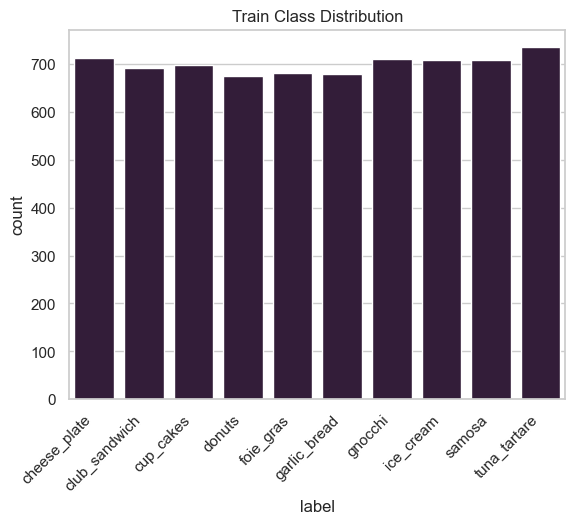

In [69]:
sns.set(style="whitegrid")
sns.set_palette("rocket")
ax = sns.countplot(x='label', data=train_df, order=sorted(train_df['label'].unique()))
ax.set(title='Train Class Distribution')
plt.xticks(rotation=45, ha="right")
plt.show()


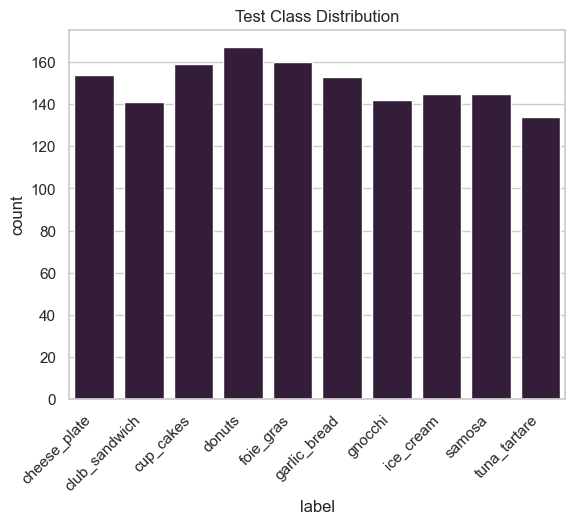

In [70]:
sns.set(style="whitegrid")
sns.set_palette("rocket")
ax = sns.countplot(x='label', data=test_df, order=sorted(test_df['label'].unique()))
ax.set(title='Test Class Distribution')
plt.xticks(rotation=45, ha="right")
plt.show()


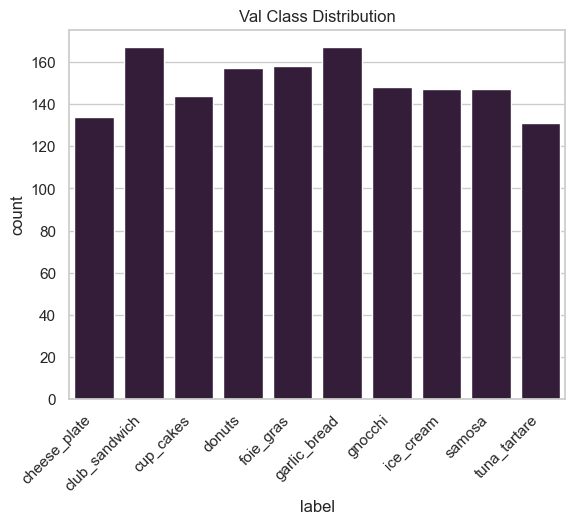

In [71]:
sns.set(style="whitegrid")
sns.set_palette("rocket")
ax = sns.countplot(x='label', data=val_df, order=sorted(val_df['label'].unique()))
ax.set(title='Val Class Distribution')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
target_folders = ["test", "train", "val"]
path_destination = "/Users/dtidigital/Downloads/food-101"

for folder in target_folders:
    if not os.path.exists(f"{path_destination}/{folder}"):
        os.makedirs(f"{path_destination}/{folder}")

for i in range(0, 10):
    for folder in target_folders:
        if not os.path.exists(f"{path_destination}/{folder}/{labels[i]}"):
            os.makedirs(f"{path_destination}/{folder}/{labels[i]}")

In [49]:
print(len(train_df))
print(len(test_df))
print(len(val_df))

7000
1500
1500


In [56]:
print("Train")
for index, row in train_df.iterrows():
    print(f"\r{index}/{len(train_df)}", end="", flush=True)
    file_path_source = f"{directory_source_path}/{row['image_path']}"
    new_file_path = f"{path_destination}/train/{row['image_path']}"

    if not os.path.exists(new_file_path):
        shutil.copy(file_path_source, new_file_path)

print("\nTest")
for index, row in test_df.iterrows():
    print(f"\r{index}/{len(train_df)}", end="", flush=True)
    file_path_source = f"{directory_source_path}/{row['image_path']}"
    new_file_path = f"{path_destination}/test/{row['image_path']}"

    if not os.path.exists(new_file_path):
        shutil.copy(file_path_source, new_file_path)

print("\nVal")
for index, row in val_df.iterrows():
    print(f"\r{index}/{len(train_df)}", end="", flush=True)
    file_path_source = f"{directory_source_path}/{row['image_path']}"
    new_file_path = f"{path_destination}/val/{row['image_path']}"

    if not os.path.exists(new_file_path):
        shutil.copy(file_path_source, new_file_path)

Train
6999/7000
Test
1499/7000
Val
1499/7000